# Clustering Jewelry Customer Data using K-Means, Hierarchical, and DBScan Algorithms (Persona Identification)

### At a local jewelry store, we've collected features such as: age, income, spending score and savings. We will use these features to segment the customers and create customer personas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/datamanda/MMASandbox/master/data/jewelry_customers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [8]:
col_names = df.columns

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


In [10]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [11]:
#check the data type
df.dtypes


Age                int64
Income             int64
SpendingScore    float64
Savings          float64
dtype: object

In [12]:
#check for missing NAN
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

## Load the package

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
#default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('figure', figsize=[8.0, 5.0]) # controls the size of the figure
plt.rc('font', size=SMALL_SIZE) # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE) # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
plt.rc('axes', grid=True)

## Scaling

### Scaling the features to transform to an appropriate unit variance, removes the means of the features

In [15]:
X = df.copy()

X.head(10)

In [16]:
scaler = StandardScaler() 
features = ['Age', 'Income', 'SpendingScore', 'Savings']
X[features] = scaler.fit_transform(X[features])

In [17]:
X = StandardScaler().fit_transform(df)

In [18]:
X

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312853e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889623e-01,
         5.10463045e-01]])

# 1.1 Clustering Algorithm #1 

### DBSCAN Clustering Algorithm

In [19]:
db = DBSCAN(eps=0.3, min_samples=6)
#db = DBSCAN(eps=0.5, min_samples=5)
db.fit(X)

DBSCAN(eps=0.3, min_samples=6)

In [24]:
# Fit Model
db.labels = db.fit_predict(X)

In [25]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  4,  3,  3,  3,  0,  4,  0,
        1,  1,  4,  3,  4,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        3,  0,  1,  0,  3,  3,  0,  1,  2,  0,  0,  2,  4,  2,  3,  0,  1,
        3,  2,  1,  0,  1,  3,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  3,  1,  1,  3,  0,  3,  0,  0,  2,  0, -1,  0,  1,  1,
        3,  3,  0,  0,  0,  0,  0,  2,  1,  0,  2,  3,  0,  0,  3,  3,  2,
        3,  2,  3,  1, -1,  3,  3,  0,  1,  3,  0,  3,  3,  3,  0,  3, -1,
        1,  3,  1,  1,  1,  3,  4,  0,  1,  0,  0,  3,  0,  3,  0,  2,  1,
        4,  2,  0,  3,  1,  0,  0,  2,  0,  2,  0,  4,  0,  1,  0,  3,  1,
        0,  1,  4,  3,  0,  1,  0,  3,  1,  0,  3, -1,  3,  1,  0,  3,  0,
        1,  0,  3,  0,  1,  0,  0,  1,  1,  1,  0,  0,  3,  2,  2,  1,  3,
        0,  0,  0,  3,  1,  0,  0,  0,  1, -1,  3,  1,  1,  1,  3,  0,  3,
        0,  3,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  3,  2,  3,  1,  0,
        0,  3,  1,  3,  2

In [26]:
silhouette_score(X,db.labels_)

0.7596175101273176

In [27]:
# Number of Unique Clusters
set(db.labels_) 

{-1, 0, 1, 2, 3, 4}

In [28]:
X = pd.DataFrame(X)

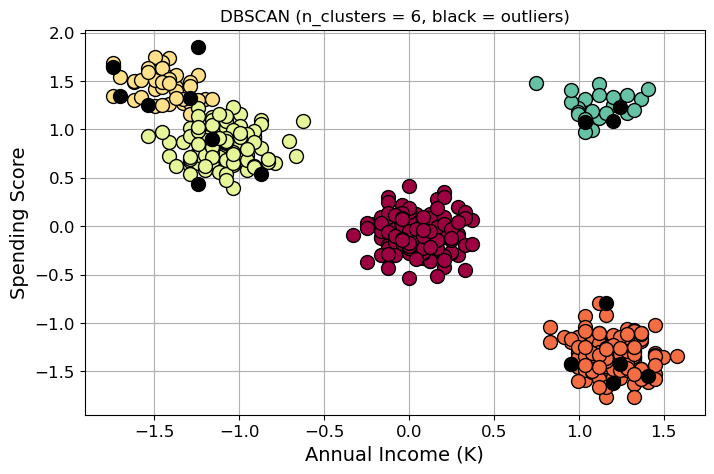

In [29]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

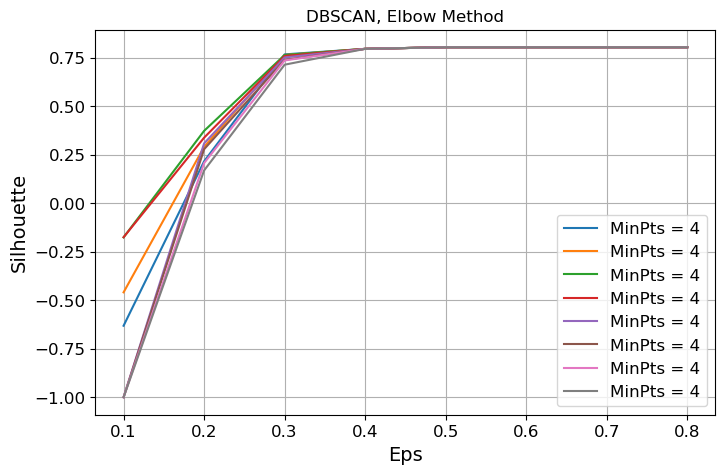

In [30]:
#Define the best hyperparameter
silhouettes = {}

#Test esps btn range and min samples
epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
  for j, mins in enumerate(minss):
    db = DBSCAN(eps=eps, min_samples=mins).fit(X)
    if len(set(db.labels_)) == 1:
        ss[i, j] = -1
    else:
        ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean')

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[1]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');

In [31]:
#Assign silhouette values
silhouette_samples_values = silhouette_samples(X, db.labels_)
#print(silhouette_samples_values)

#Create a new table that shows Cluster ID and silhouette value
DBs_data_new = X.copy()
DBs_data_new['Cluster ID'] = db.labels_
DBs_data_new['Silhouette'] = silhouette_samples_values
DBs_data_new = DBs_data_new.sort_values(['Silhouette'])
DBs_data_new.head(5)

,0,1,2,3,Cluster ID,Silhouette
196,-1.286268,1.327012,1.419709,-2.275742,2,0.656586
337,-1.742394,1.646975,1.360335,-2.399206,2,0.662592
290,1.160228,-0.795480,-0.757667,0.591929,1,0.673153
80,-0.000821,-0.026067,1.064913,-0.265897,0,0.674761
407,-0.622811,1.088200,-0.755187,0.445998,4,0.674795


In [32]:
eps_range = [0.3, 0.35, 0.4, 0.45, 0.5]
min_samples_range = [10, 20, 30, 40, 50]
range_n_clusters = [2, 3, 4, 5, 6]

for eps in eps_range:
    for min_samp in min_samples_range:

        db = DBSCAN(eps=eps, min_samples=min_samp).fit(X)
        cluster_labels = db.labels_
        n_clusters = len(set(cluster_labels))
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For eps =", eps, ", min_samples = ", min_samp, ", n_clusters = ", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

For eps = 0.3 , min_samples =  10 , n_clusters =  6 The average silhouette_score is : 0.7147946139498471
For eps = 0.3 , min_samples =  20 , n_clusters =  4 The average silhouette_score is : 0.5766617915017335
For eps = 0.3 , min_samples =  30 , n_clusters =  4 The average silhouette_score is : 0.49871420184510107
For eps = 0.3 , min_samples =  40 , n_clusters =  4 The average silhouette_score is : 0.31446123786651464
For eps = 0.3 , min_samples =  50 , n_clusters =  4 The average silhouette_score is : 0.1055754438240698
For eps = 0.35 , min_samples =  10 , n_clusters =  6 The average silhouette_score is : 0.7827401673618568
For eps = 0.35 , min_samples =  20 , n_clusters =  5 The average silhouette_score is : 0.7353868305514377
For eps = 0.35 , min_samples =  30 , n_clusters =  4 The average silhouette_score is : 0.6646424534348379
For eps = 0.35 , min_samples =  40 , n_clusters =  4 The average silhouette_score is : 0.6458244672812745
For eps = 0.35 , min_samples =  50 , n_clusters =

Seems like the silhouette scores for 5 clusters averages around (~0.8).

# 1.2 Clustering Algorithm #2

##### Hierarchical Clustering Algorithm
##### - The process of building a hierarchy or ordering of clusters till one cluster is left
##### - Merging clusters
##### - Dendogram to detect n)clusters to use and end at

In [33]:
#Additive(Agglomerative) Hierarchical Clustering
Hier_df = df.copy()

In [34]:
Hier_df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [35]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [36]:
agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [37]:
silhouette_score(X, agg.labels_)

0.8048976287755765

In [38]:
import scipy.cluster
agg = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

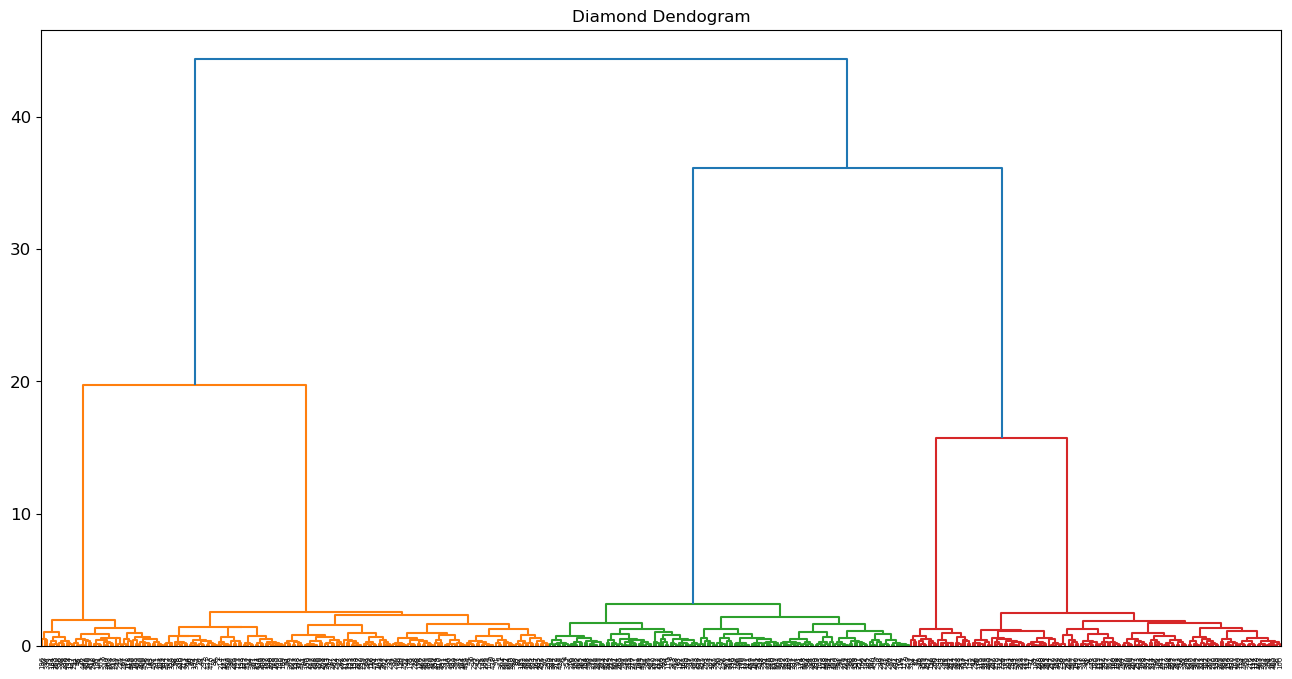

In [39]:
# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Diamond Dendogram");
dend = scipy.cluster.hierarchy.dendrogram(agg);
#plt.savefig('out/diamond_dendro_1.png');

In [40]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(agg, K, criterion="maxclust")

In [41]:
df['Cluster ID'] = labels
df.head(9)

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,3
5,29,131578,0.847034,3535.514352,1
6,54,76500,0.785198,6878.884249,2
7,87,42592,0.355290,18086.287158,3
8,83,34384,0.324719,14783.379086,3


### For each cluster, show feature means

In [42]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, Hier_df.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = Hier_df[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    
    print(scaler.inverse_transform(means[i,:].reshape(1,-1)))
    #print(scaler.inverse_transform(means[i,:].reshape(1,-1)))

means


Cluster 1 (n=50):
[[6.42e+02 4.60e+09 7.38e-01 2.02e+07]]

Cluster 2 (n=157):
[[1.50e+03 2.61e+09 7.05e-01 3.41e+07]]

Cluster 3 (n=147):
[[2.18e+03 1.00e+09 5.90e-01 8.24e+07]]

Cluster 4 (n=25):
[[2.13e+03 4.31e+09 5.23e-01 7.32e+07]]

Cluster 5 (n=126):
[[8.49e+02 3.79e+09 5.85e-01 7.40e+07]]


array([[    24.18, 128029.12,      0.9 ,   4087.52],
       [    59.96,  72448.06,      0.77,   6889.97],
       [    87.78,  27866.1 ,      0.33,  16659.26],
       [    86.  , 119944.04,      0.07,  14808.68],
       [    32.78, 105265.81,      0.31,  14962.78]])

In [43]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    Hier_df_tmp= Hier_df
    exemplar_idx = distance.cdist([means[i]], Hier_df).argmin()

    print('\nCluster {}:'.format(label))
    #print(" Examplar ID: {}".format(exemplar_idx))
    #print(" Label: {}".format(labels[exemplar_idx]))
    #print(" Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings,Cluster ID
499,25,128625,0.816739,4914.117127,1



Cluster 2:


,Age,Income,SpendingScore,Savings,Cluster ID
419,51,72086,0.791115,6732.096069,2



Cluster 3:


,Age,Income,SpendingScore,Savings,Cluster ID
375,84,27384,0.313647,16734.672754,3



Cluster 4:


,Age,Income,SpendingScore,Savings,Cluster ID
224,29,119366,0.358771,15012.853014,5



Cluster 5:


,Age,Income,SpendingScore,Savings,Cluster ID
395,31,105006,0.374166,15419.417763,5


# 1.3 Clustering Algorithm #3

### K-Means Clustering Algorithm

KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

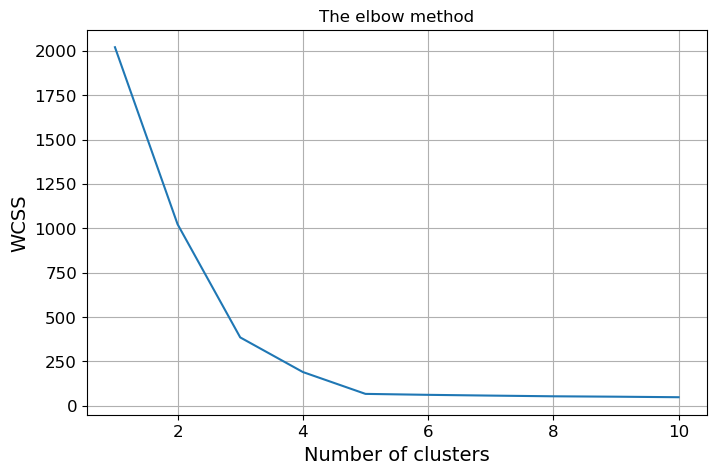

In [44]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [47]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [48]:
k_means.cluster_centers_

array([[-1.09,  0.83, -0.75,  0.63],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [-1.44,  1.46,  1.51, -1.57],
       [ 1.12,  1.24, -1.68,  0.6 ]])

In [49]:
# WCSS == Inertia
k_means.inertia_

66.5111137485908

In [50]:
silhouette_score(X, k_means.labels_)

0.8048976287755765

#### Look at Individual Silhoutte Scores, let's look at highest and lowest Silhouette Scores

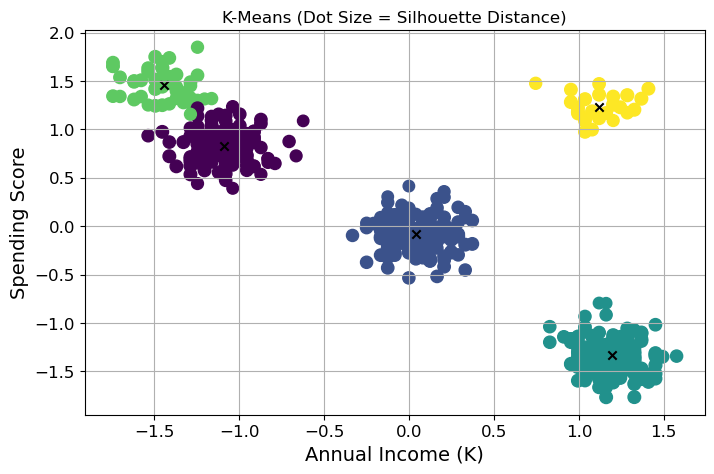

In [51]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Annual Income (K)');
plt.ylabel('Spending Score');

In [52]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,0,1,2,3,Cluster ID,Silhouette
196,-1.286268,1.327012,1.419709,-2.275742,3,0.656586
337,-1.742394,1.646975,1.360335,-2.399206,3,0.662592
290,1.160228,-0.795480,-0.757667,0.591929,2,0.673153
80,-0.000821,-0.026067,1.064913,-0.265897,1,0.674761
407,-0.622811,1.088200,-0.755187,0.445998,0,0.674795


,0,1,2,3,Cluster ID,Silhouette
372,1.201694,-1.471505,-0.571902,0.986563,2,0.867716
464,1.118762,-1.329586,-0.677416,1.065545,2,0.868368
121,1.201694,-1.374445,-0.741044,1.060476,2,0.869548
379,1.243160,-1.397806,-0.706762,0.945914,2,0.872481
335,1.243160,-1.350862,-0.690416,0.949109,2,0.872949


In [53]:
scaler.inverse_transform(k_means.cluster_centers_)

array([[    32.78, 105265.81,      0.31,  14962.78],
       [    59.96,  72448.06,      0.77,   6889.97],
       [    87.78,  27866.1 ,      0.33,  16659.26],
       [    24.18, 128029.12,      0.9 ,   4087.52],
       [    86.  , 119944.04,      0.07,  14808.68]])

In [54]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label].head()))


Cluster 0:
[[    36.    99780.        0.27  16398.4 ]
 [    30.    99949.        0.34  13621.64]
 [    31.   107963.        0.29  13407.08]
 [    30.   101073.        0.31  14324.56]
 [    33.   101058.        0.32  14911.87]]

Cluster 1:
[[   58.   77769.       0.79  6559.83]
 [   59.   81799.       0.79  5417.66]
 [   62.   74751.       0.7   9258.99]
 [   59.   74373.       0.77  7346.33]
 [   54.   76500.       0.79  6878.88]]

Cluster 2:
[[   87.   17760.       0.35 16869.51]
 [   87.   42592.       0.36 18086.29]
 [   83.   34384.       0.32 14783.38]
 [   84.   27693.       0.37 17879.56]
 [   87.   31481.       0.32 16180.69]]

Cluster 3:
[[    29.   131578.        0.85   3535.51]
 [    30.   122788.        0.87   5706.15]
 [    17.   134966.        0.91   4128.04]
 [    20.   129142.        0.89   5603.12]
 [    18.   130813.        0.89   5256.43]]

Cluster 4:
[[    85.   111389.        0.04  16009.24]
 [    92.   122879.        0.06  13709.67]
 [    88.   120678.        0.0

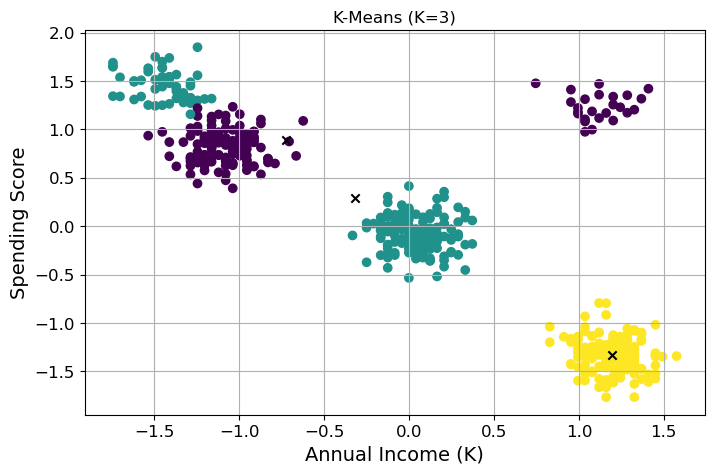

K=3, WCSS=384.81, Sil=0.70


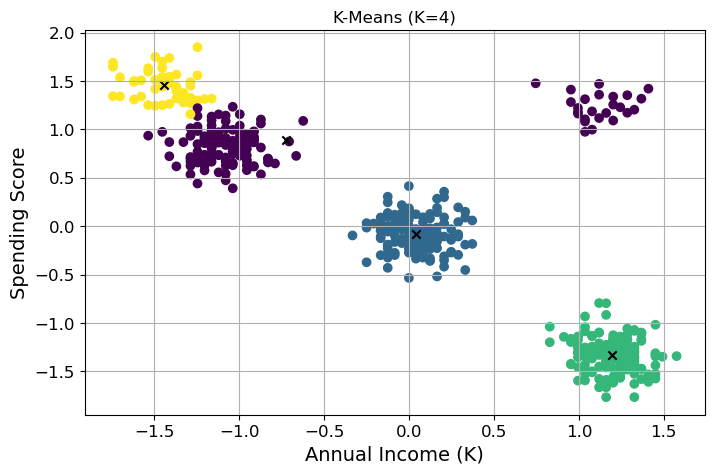

K=4, WCSS=189.70, Sil=0.76


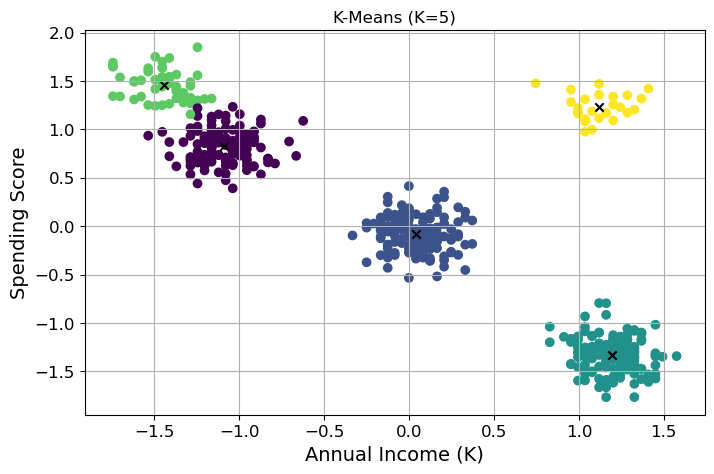

K=5, WCSS=66.51, Sil=0.80


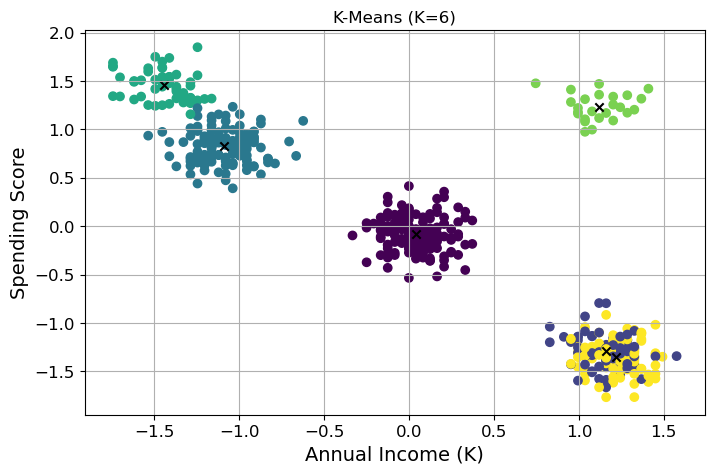

K=6, WCSS=61.15, Sil=0.63


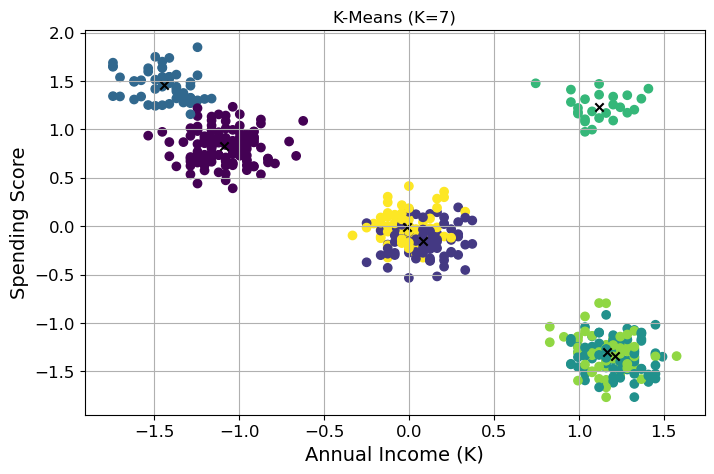

K=7, WCSS=56.96, Sil=0.45


In [55]:
def do_kmeans(X_tmp, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X_tmp)

    plt.figure();
    plt.scatter(X_tmp.iloc[:, 0], X_tmp.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X_tmp, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(3, 8):
    do_kmeans(X, k)

## Interpreting Clusters

In [56]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [57]:
labels = kmeans.labels_

In [58]:
col_names = X.columns

In [59]:
import pandas as pd
import numpy as np
from scipy import stats

# Ensure display settings are applied correctly
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler, col_names):
    """Convert statistical description to a DataFrame and inverse transform values"""
    tmp_df = pd.DataFrame(columns=col_names)

    # Ensure values are reshaped properly for inverse transform
    tmp_df.loc[0] = scaler.inverse_transform(np.array(d.minmax[0]).reshape(1, -1)).flatten()
    tmp_df.loc[1] = scaler.inverse_transform(np.array(d.mean).reshape(1, -1)).flatten()
    tmp_df.loc[2] = scaler.inverse_transform(np.array(d.minmax[1]).reshape(1, -1)).flatten()
    tmp_df.loc[3] = scaler.inverse_transform(np.array(d.variance).reshape(1, -1)).flatten()
    tmp_df.loc[4] = scaler.inverse_transform(np.array(d.skewness).reshape(1, -1)).flatten()
    tmp_df.loc[5] = scaler.inverse_transform(np.array(d.kurtosis).reshape(1, -1)).flatten()

    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis']
    return tmp_df.T

# Convert X to DataFrame if it's a NumPy array
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)  # Convert to DataFrame to avoid 'columns' error
    col_names = [f'Feature_{i}' for i in range(X.shape[1])]  # Create generic column names
    X.columns = col_names
else:
    col_names = X.columns.tolist()


print('All Data:')
print(f'Number of Instances: {X.shape[0]}')

# Describe full dataset
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler, col_names)) 
# Iterate over unique labels in clustering
for label in sorted(set(labels)):
    cluster_data = X[labels == label]  # Ensure correct selection
    d = stats.describe(cluster_data, axis=0)
    
    print(f'\nCluster {label}:')
    print(f'Number of Instances: {d.nobs}')
    display(stats_to_df(d, scaler, col_names)) 

#Feature_0 is age, Feature_1 is Income, Feature_2 is SpendingScore and Feature_3 is Savings


All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,17.00,59.02,97.00,83.18,57.56,24.79
1,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
2,0.00,0.51,1.00,0.76,0.57,0.14
3,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 0:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,22.00,32.78,44.00,59.62,62.86,66.99
1,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
2,0.17,0.31,0.41,0.51,0.45,0.51
3,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23



Cluster 1:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,79.00,87.78,97.00,59.53,58.71,47.69
1,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
2,0.20,0.33,0.47,0.51,0.59,0.63
3,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,51.00,59.96,68.00,59.49,63.48,52.66
1,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
2,0.66,0.77,0.91,0.51,0.61,0.58
3,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,17.00,24.18,31.00,59.58,49.02,45.82
1,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
2,0.81,0.90,1.00,0.51,0.55,0.44
3,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
0,77.00,86.00,93.00,59.58,56.77,58.46
1,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
2,0.00,0.07,0.16,0.51,0.62,0.36
3,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13


### Model Comparison

##### I think the Hierarchical Clustering is the best clustering model for us to implement
##### As we can see from the "silhouette_score" from the above models
##### - DBSCAN: 0.75962
##### - Hierarchical Clustering: 0.80489
##### - K-Means: 0.80489 
##### Based on the result of the score, we can say that Hierarchical Clustering and K-Means Clustering are the same. 
##### However, the dataset has 505 instances with 4 features only. Hierarchical clustering shows clusters on dendrogram at various granularities whereas the K-Means assigns each data point to one cluster. 
##### The advantage of Hierarchical clustering includes helping to identify an optimal number of clusters based on visual inspection and do not need to determine predefined number of clusters or other estimates on the parameter like what we do in DBscan. 

##### The disadvantage of Hierarchical clustering is lack of scalability, if data is too large, it requires high computational cost. 

##### Using the dendogram will provide the tree and shows how different sub-clusters relate to each other. 

##### In conclusion, best way to decide which clustering algorithm to select would depend on our problem statement and business requirement. 



### Personas

#### Cluster 1: Young Working Class
These individuals' average age range is around 20's - 40's. They have high income levels with relatively high savings. They are most likely working steady full-time jobs but their spending score is moderate. These individuals are most likely only spending for daily necessities and life milestones.

#### Cluster 2: Grandparents with a pension
This group of 79 - 97 year old's might be living off their retirement savings plan and pension funds with an average annual income of $28K. They have a very low spending score and have the highest savings. Most likely having high profiles in investment properties or stocks. 

#### Cluster 3: Almost retired, start saving!
This group is nearing retirement ages (51-68) and have a relatively high spending score and low savings, around $6K. Their income bracket belongs to a lower-tier class and they require some lifestyle changes to able to retire comfortably and have enough emergency funds to save for a rainy day.    

#### Cluster 4: Highly affluent and Young
This group has very high spending and these individuals also happen to be the youngest age range, spanning from 17 and 31. They have an average income level at 128K, but also living with least amount of savings at $4K. They need to reassess their life goals and be wiser in their spending expenditures. 

#### Cluster 5: Frugal senior business owners 
This group comprised of senior citizens, age range spanning from 77-93. They are still making great income at an average of $119K. They have good level of savings and the lowest spending score. They are most likely earning income from their businesses and they have accomplished many milestones in life that is already rewarding to them. There is no need to spend extra to gain happiness in life. 

### References
- https://github.com/stepthom/sandbox/blob/master/slides_clustering_interpret.ipynb
- https://github.com/stepthom/sandbox/blob/master/slides_clustering.ipynb
- https://www.geeksforgeeks.org/hierarchical-clustering/
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html